<a href="https://colab.research.google.com/github/Ratnesh-bhosale/Sentiment-Analysis-using-RNN/blob/main/Sentiment_Analysis_(Emotions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
# Text processing library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Deep Learning library
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D

from tensorflow.keras import backend as K

In [ ]:
train_data = pd.read_csv("train.txt", header = None)
validation_data = pd.read_csv("val.txt", header = None)
test_data = pd.read_csv("test.txt", header = None)

In [ ]:
train_data.head()

,0
0,i didnt feel humiliated;sadness
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wro...
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy;anger


In [ ]:
validation_data.head()

,0
0,im feeling quite sad and sorry for myself but ...
1,i feel like i am still looking at a blank canv...
2,i feel like a faithful servant;love
3,i am just feeling cranky and blue;anger
4,i can have for a treat or if i am feeling fest...


In [ ]:
test_data.head()

,0
0,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty;sadness
2,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this on...


In [ ]:
train_data.shape, validation_data.shape, test_data.shape

((16000, 1), (2000, 1), (2000, 1))

In [ ]:
# Rename dataset
train_data.rename(columns = {0: "description"}, inplace = True)
validation_data.rename(columns = {0: "description"}, inplace = True)
test_data.rename(columns = {0: "description"}, inplace = True)

In [ ]:
train_data

,description
0,i didnt feel humiliated;sadness
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wro...
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy;anger
...,...
15995,i just had a very brief time in the beanbag an...
15996,i am now turning and i feel pathetic that i am...
15997,i feel strong and good overall;joy
15998,i feel like this was such a rude comment and i...


In [ ]:
# We can see here emotion is attached with description. we'll seperate it.
train_data[["text", "emotion"]] = train_data["description"].str.split(";", expand = True)
train_data = train_data.drop("description", axis = 1)

test_data[["text", "emotion"]] = test_data["description"].str.split(";", expand = True)
test_data = test_data.drop("description", axis = 1)

validation_data[["text", "emotion"]] = validation_data["description"].str.split(";", expand = True)
validation_data = validation_data.drop("description", axis = 1)

In [ ]:
train_data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
print("Unique emotions in training set: ", train_data.emotion.unique())
print("Unique emotions in validation set: ", validation_data.emotion.unique())
print("Unique emotions in testing set: ", test_data.emotion.unique())

Unique emotions in training set:  ['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']
Unique emotions in validation set:  ['sadness' 'love' 'anger' 'joy' 'fear' 'surprise']
Unique emotions in testing set:  ['sadness' 'joy' 'fear' 'anger' 'love' 'surprise']


In [ ]:
train_data.isnull().sum(),test_data.isnull().sum(),validation_data.isnull().sum()

(text       0
 emotion    0
 dtype: int64, text       0
 emotion    0
 dtype: int64, text       0
 emotion    0
 dtype: int64)

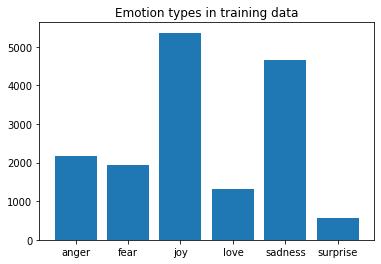

In [ ]:
plt.figure(figsize = (6, 4))
plt.bar((train_data.groupby("emotion").size()).index, train_data.groupby("emotion").size())
plt.title("Emotion types in training data")
plt.show()

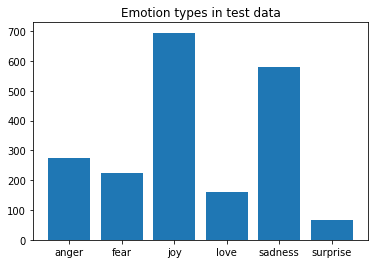

In [ ]:
plt.figure(figsize = (6, 4))
plt.bar((test_data.groupby("emotion").size()).index, test_data.groupby("emotion").size())
plt.title("Emotion types in test data")
plt.show()

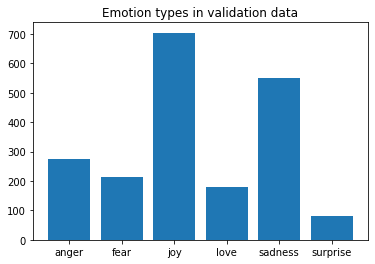

In [ ]:
plt.figure(figsize = (6, 4))
plt.bar((validation_data.groupby("emotion").size()).index, validation_data.groupby("emotion").size())
plt.title("Emotion types in validation data")
plt.show()

In [ ]:
emotions_encoded = {"anger": 0, "fear": 1, "joy": 2, "love": 3, "sadness": 4, "surprise": 5} # dictionary to encode emotions

In [ ]:
train_data.replace(emotions_encoded, inplace = True)
test_data.replace(emotions_encoded, inplace = True)
validation_data.replace(emotions_encoded, inplace = True)

In [ ]:
train_data

,text,emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


In [ ]:
# explore data
for i in range(20):
    print(train_data.text[i])

i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
im grabbing a minute to post i feel greedy wrong
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
i am feeling grouchy
ive been feeling a little burdened lately wasnt sure why that was
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i feel as confused about life as a teenager or as jaded as a year old man
i have been with petronas for years i feel that petronas has performed well and made a huge profit
i feel romantic too
i feel like i have to make the suffering i m seeing mean something
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter
i think it s the easiest time of year to feel dissatisfied
i feel low energy i m just thirsty
i have immense sympathy with the general point but a

In [ ]:
words_list = []
for value in train_data.text.str.split(' '):
    words_list.extend(value)

In [ ]:
len(words_list)

306661

In [ ]:
words_list[:10]

['i', 'didnt', 'feel', 'humiliated', 'i', 'can', 'go', 'from', 'feeling', 'so']

In [ ]:
count_words = Counter(words_list) 
# Counter function counts unique words

In [ ]:
len(count_words)

15212

In [ ]:
words_items =  count_words.items() # to store frequency of the words

In [ ]:
first_words = list(words_items)[:50]

In [ ]:
print(first_words)

[('i', 25859), ('didnt', 272), ('feel', 11183), ('humiliated', 50), ('can', 966), ('go', 393), ('from', 689), ('feeling', 5112), ('so', 2527), ('hopeless', 65), ('to', 8972), ('damned', 4), ('hopeful', 59), ('just', 1391), ('being', 681), ('around', 315), ('someone', 251), ('who', 567), ('cares', 16), ('and', 9589), ('is', 2184), ('awake', 21), ('im', 2430), ('grabbing', 5), ('a', 6200), ('minute', 24), ('post', 113), ('greedy', 65), ('wrong', 71), ('am', 2082), ('ever', 221), ('nostalgic', 51), ('about', 1795), ('the', 8370), ('fireplace', 3), ('will', 697), ('know', 853), ('that', 5112), ('it', 3127), ('still', 595), ('on', 1551), ('property', 4), ('grouchy', 27), ('ive', 587), ('been', 853), ('little', 736), ('burdened', 62), ('lately', 98), ('wasnt', 95), ('sure', 232)]


In [ ]:
print(count_words.most_common(50))

[('i', 25859), ('feel', 11183), ('and', 9589), ('to', 8972), ('the', 8370), ('a', 6200), ('feeling', 5112), ('that', 5112), ('of', 4990), ('my', 4283), ('in', 3433), ('it', 3127), ('like', 2908), ('so', 2527), ('for', 2431), ('im', 2430), ('me', 2309), ('but', 2255), ('was', 2227), ('have', 2224), ('is', 2184), ('this', 2088), ('am', 2082), ('with', 2015), ('not', 1827), ('about', 1795), ('be', 1778), ('as', 1565), ('on', 1551), ('you', 1471), ('just', 1391), ('at', 1376), ('when', 1367), ('or', 1246), ('all', 1174), ('because', 1157), ('more', 1123), ('do', 1066), ('can', 966), ('really', 942), ('up', 935), ('t', 897), ('are', 896), ('by', 886), ('very', 884), ('know', 853), ('been', 853), ('if', 809), ('out', 808), ('myself', 805)]


In [ ]:
# loads the stopwords in the English language as they are stored in the NLTK corpus
# stopwords - "and", "to", "the", "a", "that", "to", etc
stop_words = set(stopwords.words("english"))

In [ ]:
meaningful_words = [word for word in words_list if word not in stop_words]

In [ ]:
print(meaningful_words[:50])

['didnt', 'feel', 'humiliated', 'go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake', 'im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong', 'ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property', 'feeling', 'grouchy', 'ive', 'feeling', 'little', 'burdened', 'lately', 'wasnt', 'sure', 'ive', 'taking', 'milligrams', 'times', 'recommended', 'amount', 'ive', 'fallen', 'asleep', 'lot', 'faster', 'also', 'feel', 'like', 'funny']


In [ ]:
len(meaningful_words)

149649

In [ ]:
def remove_stopwords(input_text):
    words = input_text.split()
    clean_words = [word for word in words if word not in stopwords.words("english")]
    clean_words = " ".join(clean_words)
    return clean_words

In [ ]:
train_data["text"] = train_data["text"].apply(remove_stopwords)
validation_data["text"] = validation_data["text"].apply(remove_stopwords)
test_data["text"] = test_data["text"].apply(remove_stopwords)

In [ ]:
train_data.head()

,text,emotion
0,didnt feel humiliated,4
1,go feeling hopeless damned hopeful around some...,4
2,im grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,3
4,feeling grouchy,0


In [ ]:
train_data.isna().sum(), validation_data.isna().sum(), test_data.isna().sum()

(text       0
 emotion    0
 dtype: int64, text       0
 emotion    0
 dtype: int64, text       0
 emotion    0
 dtype: int64)

In [ ]:
print(pd.Series(train_data["text"]).str.len().mean())
print(pd.Series(train_data["text"]).str.len().max())

61.6723125
232


In [ ]:
strings_len = pd.Series(train_data["text"]).str.len()

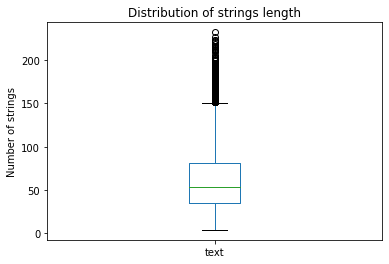

In [ ]:
strings_len.plot.box()
plt.title("Distribution of strings length")
plt.ylabel("Number of strings")
plt.show()

In [ ]:
strings_len.describe()

count    16000.000000
mean        61.672312
std         35.230294
min          4.000000
25%         35.000000
50%         54.000000
75%         81.000000
max        232.000000
Name: text, dtype: float64

In [ ]:
def separate_features_and_labels(dataset):
    features = dataset["text"].to_numpy()
    labels = dataset["emotion"].to_numpy()
    return (features, labels)

In [ ]:
(train_features, train_labels) = separate_features_and_labels(train_data)
(validation_features, validation_labels) = separate_features_and_labels(validation_data)
(test_features, test_labels) = separate_features_and_labels(test_data)

In [ ]:
train_labels

array([4, 4, 0, ..., 2, 0, 4])

In [ ]:
VOCABULARY_SIZE = 16000
EMBEDDING_DIM = 32
MAX_LENGTH = 80
PADDING_TYPE = "post"
TRUNC_TYPE = "post"

In [ ]:
tokenizer = Tokenizer(num_words = VOCABULARY_SIZE)

In [ ]:
tokenizer.fit_on_texts(train_features)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_features)

In [ ]:
for i in range (10):
    print(train_sequences[i])

[49, 1, 562]
[31, 2, 380, 3354, 438, 44, 55, 1349, 1125]
[4, 2918, 1023, 178, 1, 381, 326]
[68, 2, 549, 4016, 6, 15, 3355]
[2, 943]
[16, 2, 9, 407, 210, 219, 62]
[16, 220, 7255, 93, 7256, 767, 16, 2334, 1253, 63, 1747, 39, 1, 3, 343]
[1, 327, 18, 1551, 642, 90, 160, 263]
[5115, 112, 1, 5115, 5116, 47, 46, 916, 4017]
[1, 550]


In [ ]:
np.array(train_sequences[153])

array([  35,    6,    2,  646,  121,  671,  646,  651, 7329, 1561, 2159,
       4039, 1649, 4039,  646,    2,  805,    3, 4040, 1362, 3383,    4,
        472])

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen = MAX_LENGTH, padding = PADDING_TYPE, truncating = TRUNC_TYPE)

In [ ]:
train_padded[153]

array([  35,    6,    2,  646,  121,  671,  646,  651, 7329, 1561, 2159,
       4039, 1649, 4039,  646,    2,  805,    3, 4040, 1362, 3383,    4,
        472,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
def decode_sentence(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [ ]:
print(decode_sentence(train_padded[153]))
print(train_features[153])

always know feeling artistic write name artistic mood manitz draw circle dot bigger dot artistic feeling line like accent mark spanish im pissed ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
always know feeling artistic write name artistic mood manitz draw circle dot bigger dot artistic feeling line like accent mark spanish im pissed


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_features)
test_sequences = tokenizer.texts_to_sequences(test_features)

In [ ]:
validation_padded = pad_sequences(validation_sequences, maxlen = MAX_LENGTH, padding = PADDING_TYPE, truncating = TRUNC_TYPE)
test_padded = pad_sequences(test_sequences, maxlen = MAX_LENGTH, padding = PADDING_TYPE, truncating = TRUNC_TYPE)

In [ ]:
OUTPUT_SHAPE = len(set(train_labels))

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = Sequential([
        Embedding(VOCABULARY_SIZE, EMBEDDING_DIM, input_length = MAX_LENGTH),
        Dropout(0.2),
        Conv1D(filters = 256, kernel_size = 3, activation = "relu"),
        MaxPooling1D(pool_size = 3),
        Conv1D(filters = 128, kernel_size = 3, activation = "relu"),
        MaxPooling1D(pool_size = 3),
        LSTM(128),
        Dense(128, activation = "relu"),
        Dropout(0.2),
        Dense(64, activation = "relu"),
        Dense(OUTPUT_SHAPE, activation = "softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 32)            512000    
_________________________________________________________________
dropout (Dropout)            (None, 80, 32)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 78, 256)           24832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 26, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 128)           98432     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               1

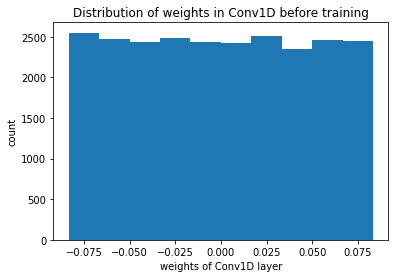

In [ ]:
plt.hist(model.layers[2].get_weights()[0].ravel())
plt.xlabel("weights of Conv1D layer")
plt.ylabel("count")
plt.title("Distribution of weights in Conv1D before training")
plt.show()

In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = OPTIMIZER,
              metrics = ["accuracy"])

In [ ]:
history = model.fit(train_padded, train_labels,
                    epochs = 150,
                    validation_data = (validation_padded, validation_labels),
                    batch_size = 64)

Epoch 1/150
250/250 [==============================] - 37s 12ms/step - loss: 1.6139 - accuracy: 0.3318 - val_loss: 1.5842 - val_accuracy: 0.3520
Epoch 2/150
250/250 [==============================] - 3s 11ms/step - loss: 1.5817 - accuracy: 0.3296 - val_loss: 1.5961 - val_accuracy: 0.3520
Epoch 3/150
250/250 [==============================] - 3s 11ms/step - loss: 1.5796 - accuracy: 0.3311 - val_loss: 1.5926 - val_accuracy: 0.3520
Epoch 4/150
250/250 [==============================] - 3s 11ms/step - loss: 1.5458 - accuracy: 0.3337 - val_loss: 1.3768 - val_accuracy: 0.3930
Epoch 5/150
250/250 [==============================] - 3s 10ms/step - loss: 1.1599 - accuracy: 0.4516 - val_loss: 1.0920 - val_accuracy: 0.5265
Epoch 6/150
250/250 [==============================] - 3s 11ms/step - loss: 0.9681 - accuracy: 0.5871 - val_loss: 0.9812 - val_accuracy: 0.6090
Epoch 7/150
250/250 [==============================] - 3s 11ms/step - loss: 0.8584 - accuracy: 0.6603 - val_loss: 0.9146 - val_accuracy

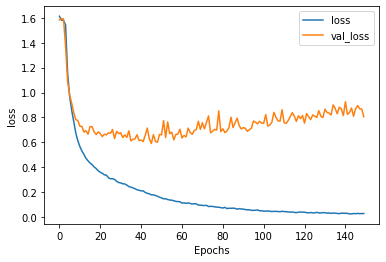

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_'+"loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss" ,'val_loss'])
plt.show()

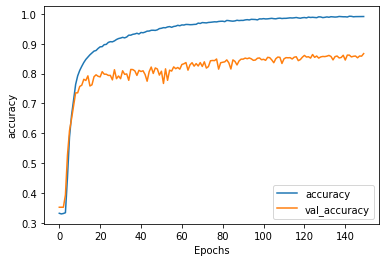

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_'+"accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy" ,'val_accuracy'])
plt.show()

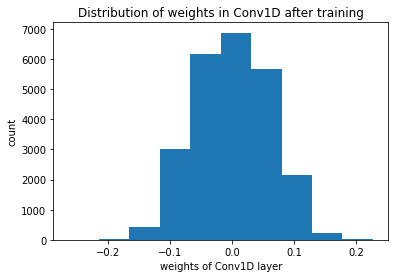

In [ ]:
plt.hist(model.layers[2].get_weights()[0].ravel())
plt.xlabel("weights of Conv1D layer")
plt.ylabel("count")
plt.title("Distribution of weights in Conv1D after training")
plt.show()

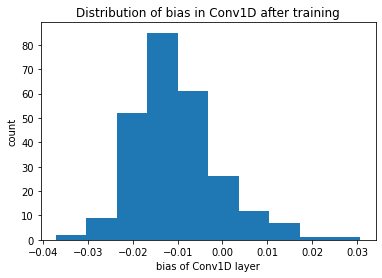

In [ ]:
plt.hist(model.layers[2].get_weights()[1].ravel())
plt.xlabel("bias of Conv1D layer")
plt.ylabel("count")
plt.title("Distribution of bias in Conv1D after training")
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_padded, test_labels)

63/63 [==============================] - 0s 3ms/step - loss: 0.7871 - accuracy: 0.8630


In [ ]:
print(f"Model accuracy is {accuracy * 100}%")

Model accuracy is 86.2999975681305%


In [ ]:
predicted_proba = np.argmax(model.predict(test_padded), axis =-1)

In [ ]:
predicted_proba

array([4, 4, 4, ..., 2, 2, 5])

In [ ]:
test_labels

array([4, 4, 4, ..., 2, 2, 1])

In [ ]:
confusion_matrix = tf.math.confusion_matrix(test_labels, predicted_proba).numpy()

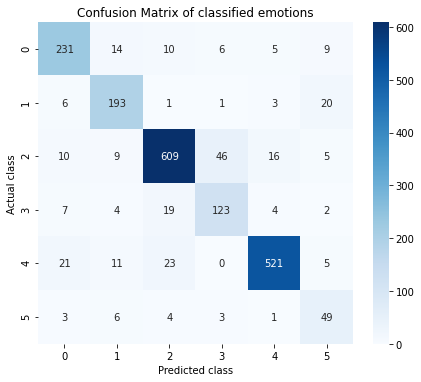

In [ ]:
figure = plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix, annot = True, fmt = ".0f", cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix of classified emotions")
plt.show()

In [ ]:
def predict(text):
  words = text.split()
  clean_words = [word for word in words if word not in stopwords.words("english")]
  text = " ".join(clean_words)
  tokenizer = Tokenizer(num_words = VOCABULARY_SIZE)
  tokenizer.fit_on_texts(text) 
  word_index = tokenizer.word_index
  text_sequences = tokenizer.texts_to_sequences(text)
  text_padded = pad_sequences(text_sequences, maxlen = MAX_LENGTH, padding = PADDING_TYPE, truncating = TRUNC_TYPE)
  print(model.predict(text_padded))
  #predicted_proba = np.argmax(model.predict(text_padded), axis =-1)
  return predicted_proba

In [ ]:
text = input("Write a sentence:")
print("Prediction:", predict(text))

Write a sentence:cry
[[8.0641061e-03 2.6541777e-04 2.6084241e-01 2.6876032e-01 4.3193248e-04
  4.6163577e-01]
 [1.3541530e-02 7.5829803e-04 2.4480174e-01 1.7823355e-01 8.3376834e-04
  5.6183112e-01]
 [1.3420248e-01 6.2552668e-02 1.0691899e-01 3.5927627e-02 1.2702956e-02
  6.4769524e-01]]
Prediction: [4 4 4 ... 2 2 5]
